# Tennis Ace
## Single Feature Linear Regression Model

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [105]:
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [106]:
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Comparing multiple columns we find that the following columns have a linear relationship with the winnings column:

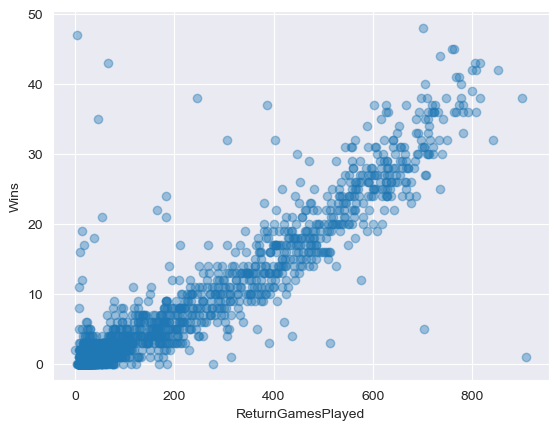

In [107]:
plt.scatter(df[['ReturnGamesPlayed']], df[['Wins']], alpha=0.4)
plt.xlabel('ReturnGamesPlayed')
plt.ylabel('Wins')
plt.show()

Since we see a linear relationship between the ReturnGamesPlayed and Winnings columns, we can use a linear regression model to predict the winnings of a player based on the number of return games played.

We are going to divide our data into training and test.

In [108]:
x_train, x_test, y_train, y_test = train_test_split(df[['ReturnGamesPlayed']], df[['Wins']], test_size=0.2, random_state=0)

We are going to train our model using the training data.

In [109]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Now we are going to feed the test data to our model and see how well it performs.

In [110]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'Wins')

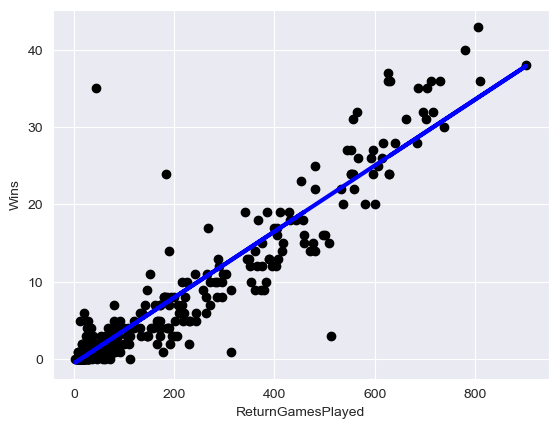

In [111]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue',linewidth=3)
plt.xlabel('ReturnGamesPlayed')
plt.ylabel('Wins')

We score our model to assess how well it performs.

In [112]:
model.score(x_test, y_test)

0.8675623118927358

## Two Feature Linear Regression Model

We create our training and test data.

In [114]:
x_train, x_test, y_train, y_test = train_test_split(df[['ReturnGamesPlayed', 'BreakPointsFaced']], df[['Wins']], test_size=0.2, random_state=0)

We train our model.

In [115]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

We feed our test data to our model. And plot the results

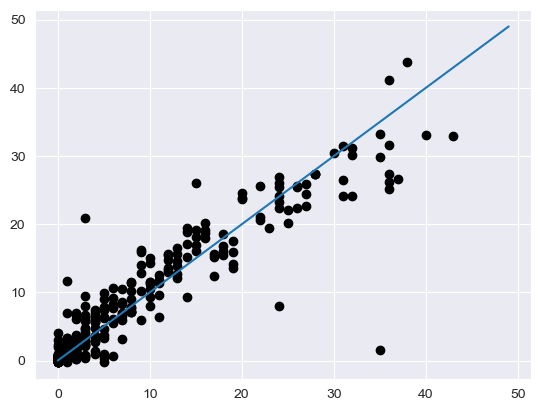

In [130]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred,  color='black')
plt.plot(range(50), range(50))

We analyze the performance of our model.

In [134]:
# Training data score
print("Training score: ", model.score(x_train, y_train))

# Test data score
print("Test score: ", model.score(x_test, y_test))

Training score:  0.8677782187856207
Test score:  0.8729501723340357


## Multiple Feature Linear Regression Model

For this model we are going to use all the features in our dataset.

In [135]:
x = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
                    'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
                    'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
                    'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
                    'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
                    'TotalServicePointsWon']]
y = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

We train our model.

In [136]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

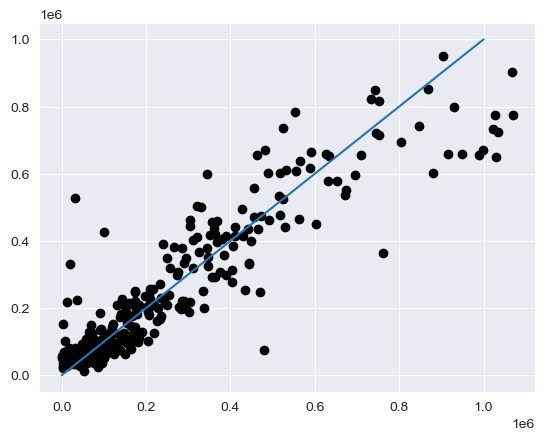

In [143]:
y_pred = model.predict(x_test)

plt.scatter(y_test, y_pred,  color='black')
plt.plot(range(1000000), range(1000000))


We analyze the performance of our model.

In [144]:
# Training data score
print("Training score: ", model.score(x_train, y_train))

# Test data score
print("Test score: ", model.score(x_test, y_test))

Training score:  0.8399418558774068
Test score:  0.8486553476960181
